In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy배열)(1~3절)</font></b>
 - [numpy](http://www.numpy.org)
 - 2차원 배열은 행렬개념으로 이해
 - numpy 패키지를 이용(c언어로 구현된 고성능 수치계산 패키지)
 # 1절 넘파이 패키지

In [4]:
import numpy as np
np.__version__

'1.23.5'

In [5]:
# np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [6]:
from numpy import arange
a = arange(15,
         # dtype=np.int32
          ).reshape(3, 5) # 3행5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
type(a) # a변수의 타입

numpy.ndarray

In [8]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [9]:
a.dtype.name

'int32'

In [10]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [11]:
a.ndim # 축수(차원수)

2

In [12]:
a.size # 배열 요소의 갯수

15

In [13]:
a.shape # 배열의 구조(3행5열)

(3, 5)

In [14]:
print('shape 조정 전 a\n', a)
a.shape = (5, 3)
print('shape 조정 후 a\n',a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [18]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
a.size # 요소갯수

12

In [20]:
a.dtype

dtype('int32')

In [21]:
a.itemsize

4

In [22]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다
a.dtype

dtype('int64')

In [23]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [24]:
a.itemsize

8

In [25]:
a.size

6

In [26]:
# 배열요소의 타입을 수정하여 리턴
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
a = a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [29]:
a.itemsize

8

In [30]:
a.size

12

In [31]:
a.ravel() #flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [32]:
a.flatten() # 함수의 결과가 return 되면 배열은 수정안됨

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
 - pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도개선)

In [34]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [38]:
%%time
import pickle
with open('data/ch10.pkl','wb') as f:
    pickle.dump(a, f)

CPU times: total: 0 ns
Wall time: 0 ns


In [36]:
import pickle
with open('data/ch10.pkl','rb') as f:
    loaded_a = pickle.load(f)

In [37]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [39]:
%%time
np.save('data/ch10.npy',a)

CPU times: total: 0 ns
Wall time: 1.16 ms


In [40]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 12.4 ms


# 2절 넘파이 배열
 - array() 함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
 - 기타합수들 : arange, ones, zeros, full, empty....linspace
 - 랜덤값을 갖는 함수들 : random
## 2.1 array()함수로 넘파이 배열 만들기
     - array(obj, dtype=np.xx나 'xx', copy=T/F)

In [42]:
a=np.array([2,4,6], dtype=np.int16) #정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [43]:
a[0], a[1], a[2]

(2, 4, 6)

In [44]:
for i in a:
    print(i, end="\t")

2	4	6	

In [48]:
# 배열은 동일 자료형의 집합 : 정수->실수->문자
b=np.array([[1.5, 2.3],
           [4,5]]
          )
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [49]:
b[0][1], b[0,1] #2차원[axis 0행, axis 1열]

(2.3, 2.3)

In [50]:
print(b.dtype) #정수의 기본타입은 int32, 실수의 기본타입은 float64
print(b.itemsize)

float64
8


In [51]:
b = b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [52]:
print(b.dtype) #정수의 기본타입은 int32, 실수의 기본타입은 float64
print(b.itemsize)

float32
4


In [53]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()

1.5	2.3	
4.0	5.0	


In [55]:
for i, row in enumerate(b):
    for j,item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i,j,item, b[i,j]), end='\t')
    print()

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [56]:
#행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [57]:
b[0,1] #없는 인덱싱시 에러 ex. b[3,0]

2

In [68]:
print('0~1행, 1~2열 :\n', b[0:2, 1:3]) 
print('2행모두(1차원) :', b[2,:], b[2])      # 모든 열을 추출할 경우, 열생략 가능
print('2행모두(2차원) :', b[2:3,:], b[2:3])
print('4열(마지막열)모두(1차원) :', b[:,4], b[...,4], b[:,-1]) # 특정열, 모든행을 추출할 경우
print('4열(마지막열)모두(2차원) :\n', b[:,4:], b[...,4:], b[:,-1:])
print('2행 0~3열 :', b[2, 0:-1] ) 
print('마지막열 제외 :\n', b[:, :-1] )

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(마지막열)모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
4열(마지막열)모두(2차원) :
 [[ 5]
 [ 0]
 [15]] [[ 5]
 [ 0]
 [15]] [[ 5]
 [ 0]
 [15]]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [62]:
for i, row in enumerate(b):
    print('{}행{}열 : ({:.1f})'.format(i,-1, b[i,-1]), end='\t')    
print()

0행-1열 : (5.0)	1행-1열 : (0.0)	2행-1열 : (15.0)	


In [64]:
for j,item in enumerate(row):
    print('{}행{}열 : ({:.1f})'.format(2,j,b[2,j]), end='\t')
print()

2행0열 : (11.0)	2행1열 : (12.0)	2행2열 : (13.0)	2행3열 : (14.0)	2행4열 : (15.0)	


In [69]:
# 스칼라 변수
a = 10
copy_a = a # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [70]:
# 데이터 구조
a = [0, 1]
copy_a = a.copy() # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [73]:
# numpy 배열
import numpy as np
c = np.array([ [1,2], [3,4] ])
#d = c # 주소 할당
d = np.array(c, copy=True) # 깊은 복사 ; d = c.copy()동일
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1169430161680 1169430859952
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
 - np.zeros(tup) : 요소들이 다 0
 - np.ones(tup) : 요소들이 다 1
 - np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
 - np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐) 
 
 ※위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성을 따로 지정 가능

In [74]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [76]:
x = np.zeros( (3,) ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [77]:
x = np.zeros( (2, 5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [80]:
np.ones((2,5), dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [81]:
np.ones((2,5), dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [83]:
np.full((2,3), 255)

array([[255, 255, 255],
       [255, 255, 255]])

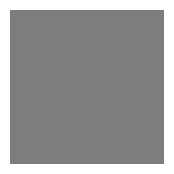

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize(가로, 세로)
img = np.full( (28,28), 125, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축 없애기
plt.show()

In [87]:
np.empty((3,2)) # 초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
 - np.random.random(tup) : 0부터 1미만의 균등분포의 갖는 랜덤값 배열
 - np.random.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포의 갖는 랜덤값 배열
 
 - np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc와 표준편차 scale을 갖는 정규분포 랜덤값
 
 - np.random.rand(n) : 0부터 1미만의 균등분포의 1차원 배열(난수 n개)
 - np.random.randn(n) :표준정규분표(평균 0, 표준편차 1)
 cf) np.random.randint(from, to) : from 부터 to미만의 정수 난수 1개 발생 == random.randint(from, to-1)

In [89]:
import random
random.randint(1, 45)

34

In [90]:
np.random.rand(2)

array([0.88916471, 0.91976152])

In [92]:
np.random.randint(1,3) # 1,2

1

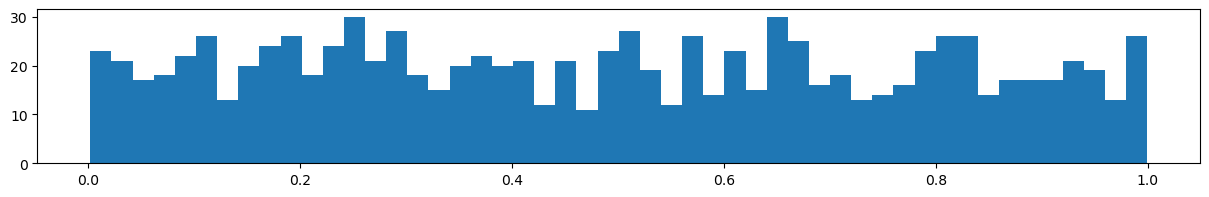

In [110]:
import matplotlib.pyplot as plt
x = np.random.rand(1000)
plt.figure(figsize=(15,2)) # 시각화한 그래프 크기 figsize(가로, 세로)
plt.hist(x, bins=50)
plt.show()

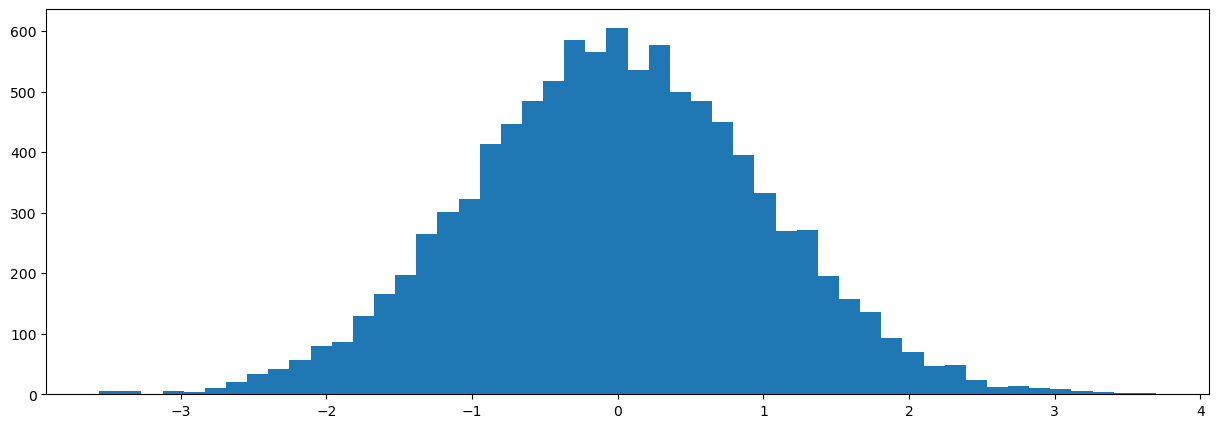

In [116]:
import matplotlib.pyplot as plt
x = np.random.randn(10000) # 정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,5)) # 시각화한 그래프 크기 figsize(가로, 세로)
plt.hist(x, bins=50)
plt.show()

In [117]:
# 1차원 난수 배열
print(np.random.rand(3)) # 균등분포
print(np.random.randn(3)) # 정규분포

[0.48626888 0.49118855 0.58029137]
[-0.27839246 -1.85522019  0.89836794]


In [118]:
# 2차원 난수 배열
np.random.random( (2,5)) # 2행 5열 균등분포(0-1미만) 난수 배열

array([[0.46954847, 0.19295698, 0.03888731, 0.86300446, 0.98800102],
       [0.94208574, 0.68908387, 0.76879663, 0.74224587, 0.75642652]])

In [119]:
np.random.uniform(low=-2, high=2, size=(2,5)) # 2행 5열 균등분포(0-1미만) 난수 배열

array([[ 1.51813208,  0.16585675, -1.65424816,  0.05670195, -1.24313259],
       [-1.80488114,  1.28143025,  1.57766851, -0.73375886, -1.92963349]])

In [120]:
np.random.normal(size=(2,5)) # 2행 5열 정규분포(평균0, 표준편차1) 난수 배열

array([[-1.75504376, -0.8923112 , -0.68694698, -0.70782192, -0.56332546],
       [-0.1917491 ,  0.54330793, -0.4292601 ,  0.82425212, -1.01398331]])

In [121]:
np.random.normal(-1, 1, size=(2,5)) # 2행 5열 정규분포(평균1, 표준편차1) 난수 배열

array([[-0.17794591, -1.7000663 , -1.38329566,  0.06662886, -2.54962063],
       [-0.40824613, -2.12973127,  1.4687634 , -1.1297456 , -1.69361628]])

## 2.4 연속된 값을 갖는 배열 만들기
 - np.arange(from, to, by, dtype) : from부터 to까지 by씩 건너뛴 값을 1차원 배열로 생성
 - np.linspace(from, to, num) : from부터 to(포함)까지 num씩 건너뛴 값을 1차원 배열로 생성

In [122]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [123]:
np.arange(0, 2.1, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

In [126]:
np.linspace(0, 5, 10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [127]:
# linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

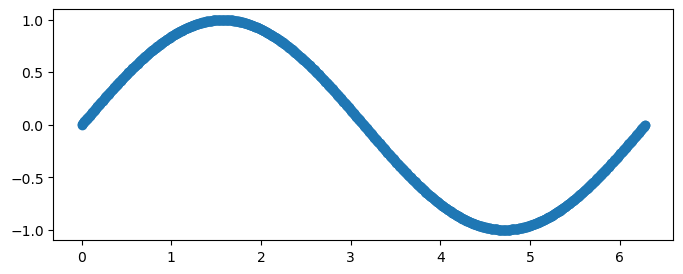

In [128]:
plt.figure(figsize=(8, 3))
plt.scatter(x, y)
plt.show()

## 2.5 배열의 차원 변경
 - reshape(행수, 열수) : -1 가능
 - resize(행수, 열수) : -1 불가
 - T : 전치행렬로 변환
 - transpose() : 전치행렬로 변환
 
 ※실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [130]:
t = np.random.random( (2,3))
t

array([[0.66473767, 0.51850479, 0.32045823],
       [0.92327728, 0.5323682 , 0.50410612]])

In [131]:
a = np.round(t*10) # 반올림 
a

array([[7., 5., 3.],
       [9., 5., 5.]])

In [132]:
a = a.astype(np.int16)
a

array([[7, 5, 3],
       [9, 5, 5]], dtype=int16)

In [134]:
a = a.reshape(3,2)
a

array([[7, 5],
       [3, 9],
       [5, 5]], dtype=int16)

In [136]:
a.reshape(-1,1) # -1이 주어지면 해당차원의 크기가 자동 계산 (행렬에 맞는 크기로 자동 조정)

array([[7],
       [5],
       [3],
       [9],
       [5],
       [5]], dtype=int16)

In [137]:
a.resize(2,3)
a

array([[7, 5, 3],
       [9, 5, 5]], dtype=int16)

In [138]:
# 전치행렬(x행y열 -> y행x열)
a.T

array([[7, 9],
       [5, 5],
       [3, 5]], dtype=int16)

In [141]:
a = a.transpose()
a

array([[7, 5, 3],
       [9, 5, 5]], dtype=int16)

## 2.6 배열의 출력

In [143]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [144]:
# 배열 요소가 몇개까지 다 출력되나? threshold 기본이 1000
np.get_printoptions()['threshold']

1000

In [148]:
np.set_printoptions(threshold=10000)
# np.set_printoptions(threshold=sys.maxsize)

In [147]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [6]:
import numpy as np
#리스트
a =  [10,20,30,40]
b = list(range(4))
a+b, a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [11]:
#numpy 배열
a = np.array([10,20,30,40])
b = list(range(4))
# 요소별 연산
a, b

(array([10, 20, 30, 40]), [0, 1, 2, 3])

In [12]:
a+b

array([10, 21, 32, 43])

In [13]:
a*3

array([ 30,  60,  90, 120])

In [10]:
a*b

array([  0,  20,  60, 120])

In [14]:
a**b

array([    1,    20,   900, 64000])

In [16]:
a < 40

array([ True,  True,  True, False])

In [19]:
a[[0,3]] # 0,3 번째 인덱스 item
a[[True, False, False, True]] # 0은 True, 1은 False, 2는 False, 3은 True
print(a[[0,3]])
print(a[[True, False, False, True]])

[10 40]
[10 40]


In [18]:
#a배열에서 40보다 작은 데이터만 추출(boolean index)
a[a<40]

array([10, 20, 30])

In [20]:
#a 배열에서 40보다 작은 데이터의 index
np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2) 행렬의 곱(@, dot함수)
cf. *(요소별 곱)

In [21]:
A = np.array([ [1,1],
               [0,1]])
B = np.array([ [2,0],
               [3,4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [22]:
print('요소별 곱 A*B =', A*B, sep='\n')
print('행렬곱 A@B =', A@B, sep='\n')
print('행렬곱 A.dot(B) =', A.dot(B), sep='\n')

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬곱 A@B =
[[5 4]
 [3 4]]
행렬곱 A.dot(B) =
[[5 4]
 [3 4]]


In [23]:
# 일반적으로는 행렬곱은 교환법칙이 성립 안 함
print('A@B =', A@B, sep='\n')
print('B@A =', B@A, sep='\n')

A@B =
[[5 4]
 [3 4]]
B@A =
[[2 2]
 [3 7]]


In [24]:
# pdf 19페이지 확인 (1)
A = np.array([ [1,2],
               [3,4]])
B = np.array([ [-1,-1],
               [1,1]])
A@B, B@A

(array([[1, 1],
        [1, 1]]),
 array([[-4, -6],
        [ 4,  6]]))

In [25]:
# pdf 19페이지 확인 (2)
A = np.array([ [1,2],
               [3,4]])
B = np.array([ [6],
               [7]])
A@B # B@A는 에러

array([[20],
       [46]])

In [26]:
# pdf 19페이지 확인 (3)
A = np.array([ [1,2,3],
               [3,4,1]])
B = np.array([ [0,0],
               [1,1],
               [-1,2]])
A@B, B@A

(array([[-1,  8],
        [ 3,  6]]),
 array([[ 0,  0,  0],
        [ 4,  6,  4],
        [ 5,  6, -1]]))

In [27]:
# 단위행렬에서는 교환법칙 성립
# pdf 19페이지 확인 (4)
A = np.array([ [2, 0],
               [3,4]])
B = np.array([ [1,0],
               [0,1]])
A@B, B@A # B : 2행2열짜리 단위행렬

(array([[2, 0],
        [3, 4]]),
 array([[2, 0],
        [3, 4]]))

In [28]:
np.eye(2) # 2행2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [29]:
np.eye(3) # 3행3열짜리 단위행렬(정방행렬)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입 연산자 사용(+=, -=, *=, ...)
 - 배열에서의 a += b는 a = a+b와 다소 다르게 작동한다

In [31]:
a = np.ones( (2, 3), dtype='int8' ) # 2행3열짜리 int8 배열
b = np.random.random( (2,3) ) # 2행3열짜리 random값(0부터 1미만) float64 배열
print(a, b, sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.49391606 0.45052789 0.06588395]
 [0.92427407 0.6105923  0.65669136]]


In [32]:
a += 256 # a+256결과를 a에 넣는데, 공간이 부족하면 앞이 짤림
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [33]:
a = a + 256 # a+256결과를 새로운 a에 할당
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [34]:
# a는 int16, b는 float64
b.dtype

dtype('float64')

In [35]:
b += a # b+a의 결과를 b에 넣는다
b

array([[257.49391606, 257.45052789, 257.06588395],
       [257.92427407, 257.6105923 , 257.65669136]])

In [36]:
a += b # a+b의 결과는 오류 발생. 잘안씀
a

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

### 4) 배열 요소별 합계
 - sum, min, max, mean, var(분산), std(표준편차)

In [38]:
a = np.array([[2,2,2,3],
              [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [41]:
print('전체 합 :', a.sum(), np.sum(a))
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : 19 19
전체 평균 : 2.375 2.375
전체 최소값 : 1 1
전체 최대값 : 4 4
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


In [42]:
# 분산에 루트를 씌우면 표준편차
import math
math.sqrt(a.var()) #math.sqrt(스칼라데이터)

0.8569568250501305

### 5) 배열 축별 집계
 - 축별 sum, min, max, mean, var(분산), std(표준편차), argmax(최대값index)

In [43]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [44]:
# 행별 합계 : axis=0(행), axis=1(열)
print('a 행별 합 : ', a.sum(axis=1))

a 행별 합 :  [ 9 10]


In [45]:
#  열별 합계 : 열을 고정하고 행(axis0축)들의 합
print('a 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))

a 열별 합 : [6 5 4 4] [6 5 4 4]


## 2.8 그 외 요소별 계산하는 범용함수들
 - 메모리를 효율적으로 사용
  * np.add(A, B, C) : C = np.add(A, B) : C=A+B
  * np.multiply(A,B,C) : C = np.multiply(A, B) : C = A+B
  * np.subtract(A,B,C)...
  * np.sqrt(배열) : 제곱근 cf) math.sqrt(스칼라변수)

In [46]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty( (2,) )
a, b, c

(array([1, 2]), array([3, 4]), array([1.06099790e-313, 8.48798317e-314]))

In [47]:
# 메모리 사용량과 속도 측정을 해주는 메모리 프로파일러를 로드
# 아나콘다 프롬프트에서 pip install 라이브러리 이름 (memory_profiler)
%load_ext memory_profiler
A = np.random.randn(100000000) # 1억개
B = np.random.randn(100000000)
C = np.random.randn(100000000)

In [48]:
A, B, C

(array([ 1.63128213,  0.94064655,  0.44713212, ..., -0.82708764,
        -0.460737  ,  0.54305283]),
 array([ 0.54961197, -1.91726368,  1.21458029, ...,  1.59770027,
         2.39554017,  0.55161025]),
 array([-0.20929598, -0.57682568, -1.3419293 , ..., -0.12328865,
        -1.25216929,  1.21922416]))

In [49]:
%%time
%memit G = A*B+C
print(G)

peak memory: 3688.75 MiB, increment: 1276.97 MiB
[ 0.6872762  -2.38029314 -0.79885144 ... -1.44472679 -2.35588329
  1.51877766]
CPU times: total: 641 ms
Wall time: 1.36 s


In [50]:
%%time
%memit np.multiply(A, B, G); np.add(G, C, G)
print(G)

peak memory: 3174.81 MiB, increment: 0.00 MiB
[ 0.6872762  -2.38029314 -0.79885144 ... -1.44472679 -2.35588329
  1.51877766]
CPU times: total: 281 ms
Wall time: 985 ms


## 2.9 브로드 케스팅

In [51]:
a = np.array([1,2,3])
b = 10
print(a+b) # 요소별 연산
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [52]:
# 1차원 배열의 브로드 케스팅
a = np.array([1,2,3])
b = np.array([10])
print(a+b) # 요소별 연산
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [53]:
b

array([10])

In [54]:
a * b

array([10, 20, 30])

In [56]:
# 2차원 배열의 브로드케스팅
a = np.array([[0,0,0],
              [10,10,10],
              [20,20,20],
              [30,30,30]]) # 4행 3열짜리 2차원 배열
b = np.array([0,1,2]) # 3열짜리 1차원
np.add(a, b), np.multiply(a, b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [55]:
# 2차원 배열의 브로드케스팅
a=np.array([[0,0,0],
            [10,10,10],
            [20,20,20],
            [30,30,30]]) #4행 3열짜리 2차원 배열
b = np.array([[0],
              [1],
              [2],
              [3]]) # 4행 1열짜리 2차원
np.add(a, b), np.multiply(a, b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [33, 33, 33]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [40, 40, 40],
        [90, 90, 90]]))

In [57]:
import numpy as np
# a, b를 모든 쌍 조합에 대해 계산을 하고 싶을 때(브로드케스팅이용)
a = np.array([0,10,20, 30]) # 4열짜리 1차원 배열
b = np.array([1, 2, 3])
# 1차원배열 a를 2차원배열로
A = a.reshape(-1, 1)
A = a[:, np.newaxis] # newaxis를 이용하여 배열의 새로운 축을 추가하여 2차원
A = np.expand_dims(a, axis=1)
A

array([[ 0],
       [10],
       [20],
       [30]])

In [58]:
A + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [59]:
# a, b를 모든 쌍 조합에 대해 계산을 하고 싶을 때
a = np.array([0,10,20, 30]) # 4열짜리 1차원 배열
b = np.array([1, 2, 3])
A, B = np.ix_(a, b)
A, B

(array([[ 0],
        [10],
        [20],
        [30]]),
 array([[1, 2, 3]]))

In [60]:
A + B

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

# 3절 배열 합치기/분리하기
 - 슬라이싱
 - 두배열을 합치는 함수
 - r_, c_
 - 하나의 배열을 여러개 작은 배열로 분리하는 함수

## 3.1 슬라이싱

In [61]:
c = np.arange(24).reshape(2, 3, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [62]:
c[0, 2, 1] # , c[2, 0, 0] 없는 index는 에러

9

In [73]:
print(c[0], c[0,:,:], c[0, ...]) # 0면의 모든 데이터(후행축은 생략 가능)
print(c[1, 0], c[1, 0, :], c[1, 0, ...]) # 1면 0행의 모든데이터(후행축은 생략 가능)
print(c[1, :, 1]) # 1면 1열의 모든 데이터(선행축이나 중간축은 생략이 불가)
print(c[:, 1:3, 2:3], c[...,1:3,2:]) # 모든면의 1~2행, 2~3열까지

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 13 14 15] [12 13 14 15] [12 13 14 15]
[13 17 21]
[[[ 6]
  [10]]

 [[18]
  [22]]] [[[ 6  7]
  [10 11]]

 [[18 19]
  [22 23]]]


## 3.2 두개 이상의 배열을 쌓아 합치는 함수
 - vstack( tup) : 아래로 추가
 - hstack( tup) : 옆으로 추가
 - dstack( tup) : 마지막 축(열)을 쌓아 합침(차원 증가)

In [74]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack( (a, b) )
print('vstack 아래로 추가하여 합치기 :', v, v.shape, sep='\n')
h = np.hstack( (a, b) )
print('hstack 옆으로 추가하여 합치기 :', h, h.shape, sep='\n')
d = np.dstack( (a, b) )
print('dstack 축을 depth로 합치기 :', d, d.shape, sep='\n')

vstack 아래로 추가하여 합치기 :
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 추가하여 합치기 :
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 :
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [93]:
c = np.arange(24).reshape(2, 3, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [94]:
a, b = c #c[0], c[1] # c[0]이 a, c[1]이 b
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [95]:
# 수직으로 합치기
np.vstack( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [96]:
np.concatenate( (a, b), axis=0 ) # axis=0이 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [97]:
np.hstack( (a, b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [98]:
np.concatenate( (a, b), axis=1 )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

 - column_stack(tup) : 1차원 배열을 2차원 배열의 열단위로 합침. dstack과 비교
 - row_stack(tup) : 행단위로 합침 == vstack()

In [99]:
a = np.array([1,2,3,4])
b= np.array([5,6,7,8])
c= np.array([9,10,11,12])
np.column_stack( (a,b,c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [87]:
np.dstack( (a,b,c) ).reshape(4,3)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [102]:
np.hstack( (a[:, np.newaxis], b[:, np.newaxis], c[:, np.newaxis]) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [103]:
# 행쌓기
np.row_stack( (a, b, c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [104]:
# 수직쌓기
np.vstack( (a, b, c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

 - stack( tup, axis=n) : axis= 0 : 첫번째 차원(2차원일때는 행, 3차원일때는 면), axis = -1(열)

In [111]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12, 24).reshape(3, 4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [112]:
# 0면에 a, 1면에 b로 stack
np.stack( (a, b), axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [113]:
# 행(1축)끼리 합쳐서 면을 이룸
np.stack( (a, b), axis=1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [114]:
# a의 행과 b의 행이 열로 합쳐서 면을 이룸
np.stack( (a, b), axis=-1)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_
 - 나열객체 

In [105]:
a = np.array([1,2,3,4])
b= np.array([5,6,7,8])
c= np.array([9,10,11,12])
np.r_[a, b, c] # 한 행

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [106]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [107]:
np.c_[a,b,c] # 칼럼단위로 쌓음

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [110]:
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열을 분리하는 함수
 - vsplit(ary, 정수나 백터) : 첫번째 축을 따라 분할(2차원의 경우 가로축 분할)
 - hsplit(ary, 정수나 백터) : 두번째 축을 따라 분할(2차원의 경우 세로축 분할)
 - dsplit(ary, 정수나 백터) : depth를 따라 분할(3차원이상에서만 동작)
   * 정수 n : n개로 분리
   * [n] : n번째 인덱스를 기점으로 분리
   * [m, n] : m번째, n번째 인덱스를 기점으로 분리

In [115]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [116]:
# 가로축을 따라 3개로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, 3)
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [117]:
# 가로축을 따라 1번 index기준으로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, [1])
a_v

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])]

In [118]:
# 가로축을 따라 1, 2번 index기준으로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, [1, 2])
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [119]:
np.hsplit(a, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [120]:
np.hsplit(a, [1,3])

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

 - stack(ary, 갯수나 인덱스백터, axis=n)
 - array_split(ary, 갯수나 인덱스백터, axis=n)
  * axis=0 : vsplit() 동일
  * axis=1 : hsplit() 동일
  * axis=2 : dsplit() 동일
  - array_split : 나눠지지 않는 정수로도 사용 가능

In [122]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [123]:
np.split(a, 2, axis=0) # axis=0 : 0번 축으로 분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [124]:
np.split(a, 2, axis=1) # axis=1 : 1번 축으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [125]:
np.array_split(a, 2, axis=1) # axis=1 : 1번 축으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [128]:
np.split(a, 3, axis=1) # 객수가 맞지 않으면 에러 발생

ValueError: array split does not result in an equal division

In [129]:
np.array_split(a, 3, axis=1) # 나눠서 떨어지지 않는 수도 분리가능

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]